In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
!wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip


In [ ]:
!unzip dino-dragon.zip

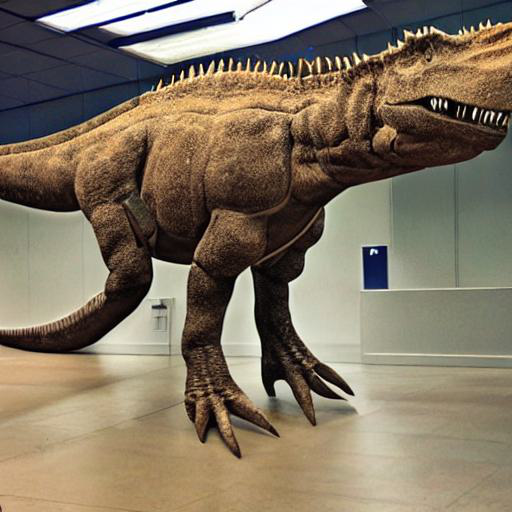

In [2]:
path = './test/dino'
name = '00f2e69c-9586-4b06-a306-8fb36b88b651.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [ ]:
inputs = keras.Input(shape=(150, 150, 3))
conv= tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3))(inputs)
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)
flatten = tf.keras.layers.Flatten()(max_pool_2d)
inner = keras.layers.Dense(64, activation='relu')(flatten)
outputs = keras.layers.Dense(1, activation='sigmoid')(inner)

In [4]:
model = keras.Model(inputs, outputs)

model.compile(loss='binary_crossentropy',
             optimizer=keras.optimizers.Adam(learning_rate=0.002),
             metrics=['accuracy'])


## Question 1

In [73]:
# Answer: binary crossentropy

## Question 2

In [6]:
model.summary()
#Answer: 11,215,873

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

## Training the model

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    './test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)
print(train_ds.class_indices)

history=model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.
{'dino': 0, 'dragon': 1}
Epoch 1/10


2022-11-21 15:40:44.002929: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-21 15:40:44.640695: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-21 15:40:44.641916: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-21 15:40:44.641968: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-21 15:40:44.642953: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-21 15:40:44.643043: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


80/80 [==============================] - 11s 108ms/step - loss: 1.4593 - accuracy: 0.6907 - val_loss: 0.3764 - val_accuracy: 0.8452
Epoch 2/10
80/80 [==============================] - 8s 106ms/step - loss: 0.1828 - accuracy: 0.9291 - val_loss: 0.4429 - val_accuracy: 0.8350
Epoch 3/10
80/80 [==============================] - 8s 106ms/step - loss: 0.0555 - accuracy: 0.9912 - val_loss: 0.5035 - val_accuracy: 0.8350
Epoch 4/10
80/80 [==============================] - 8s 105ms/step - loss: 0.0182 - accuracy: 0.9981 - val_loss: 0.3640 - val_accuracy: 0.8782
Epoch 5/10
80/80 [==============================] - 8s 106ms/step - loss: 0.0046 - accuracy: 0.9994 - val_loss: 0.3651 - val_accuracy: 0.8832
Epoch 6/10
80/80 [==============================] - 8s 106ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.3792 - val_accuracy: 0.8883
Epoch 7/10
80/80 [==============================] - 8s 104ms/step - loss: 7.9171e-04 - accuracy: 1.0000 - val_loss: 0.4009 - val_accuracy: 0.8883
Epoch 8/10
8

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

## Question 3

In [9]:
np.median(acc)
# Answer: 0.90

0.999372661113739

## Question 4

In [11]:
np.std(loss)
# Answer: 0.33

0.43232500602633095

## Data Augmentation

In [13]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

train_ds = train_gen.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 1594 images belonging to 2 classes.


In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

val_ds = test_datagen.flow_from_directory(
    './test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 394 images belonging to 2 classes.


In [16]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
80/80 [==============================] - 15s 190ms/step - loss: 0.4803 - accuracy: 0.8018 - val_loss: 0.3887 - val_accuracy: 0.8477
Epoch 2/10
80/80 [==============================] - 15s 189ms/step - loss: 0.3574 - accuracy: 0.8519 - val_loss: 0.3389 - val_accuracy: 0.8629
Epoch 3/10
80/80 [==============================] - 15s 188ms/step - loss: 0.3976 - accuracy: 0.8231 - val_loss: 0.7844 - val_accuracy: 0.7437
Epoch 4/10
80/80 [==============================] - 15s 188ms/step - loss: 0.3583 - accuracy: 0.8526 - val_loss: 0.5083 - val_accuracy: 0.8426
Epoch 5/10
80/80 [==============================] - 15s 189ms/step - loss: 0.3329 - accuracy: 0.8557 - val_loss: 0.5434 - val_accuracy: 0.8249
Epoch 6/10
80/80 [==============================] - 15s 189ms/step - loss: 0.3476 - accuracy: 0.8683 - val_loss: 0.5393 - val_accuracy: 0.8046
Epoch 7/10
80/80 [==============================] - 15s 188ms/step - loss: 0.3284 - accuracy: 0.8676 - val_loss: 0.4192 - val_accuracy: 0.8401

In [25]:
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
loss = history.history['loss']
test_loss = history.history['val_loss']


## Question 5

In [26]:
np.mean(val_loss)
# Answer: 0.37

0.4758496582508087

## Question 5

In [27]:
np.average(val_acc[5:])
# Answer: 0.84

0.8279187798500061